In [ ]:
!pip install lifelines pandas numpy matplotlib

In [32]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [34]:
# Loading and Inspecting the Dataset
df = pd.read_csv('E:/Sankhyana Consultancy/MachineLearning/healthcare_dataset.csv')
# Previewing the dataset to understand its structure
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [36]:
# Preprocess the Data
# Convert 'Date of Admission' and 'Discharge Date' to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
# Calculate the duration (in days) between admission and discharge
df['Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
# Preview the updated dataset
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Duration
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


Perform Kaplan-Meier Survival Analysis

In [38]:
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Duration'],
      dtype='object')


In [40]:
#Create the 'Status' Column
# Create the 'Status' column: 1 if Discharge Date is not null (event occurred), 0 otherwise (censored)
df['Status'] = df['Discharge Date'].notnull().astype(int)
# Verify the creation of the 'Status' column
print(df[['Discharge Date', 'Status']].head())

  Discharge Date  Status
0     2024-02-02       1
1     2019-08-26       1
2     2022-10-07       1
3     2020-12-18       1
4     2022-10-09       1


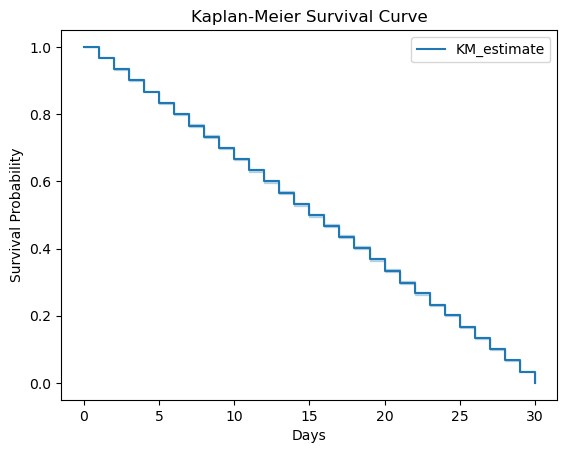

In [42]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()
# Fit the model for the entire population
kmf.fit(durations=df['Duration'], event_observed=df['Status'])
# Plot the survival function
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()

Perform Survival Analysis Based on a Condition 

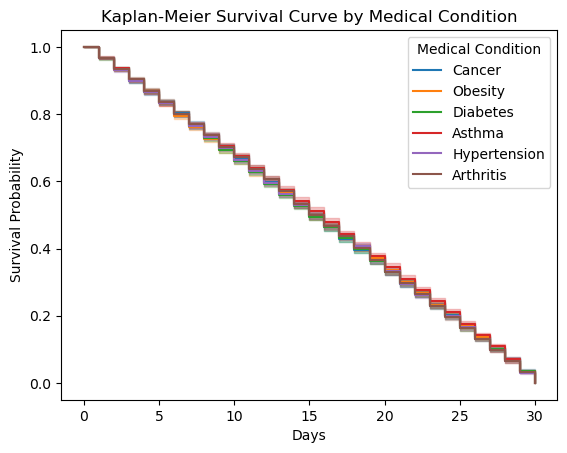

In [44]:
# Stratify by 'Medical Condition' 
groups = df['Medical Condition'].unique()
for condition in groups:
    kmf.fit(durations=df[df['Medical Condition'] == condition]['Duration'], 
            event_observed=df[df['Medical Condition'] == condition]['Status'], 
            label=condition)
    kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve by Medical Condition')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.legend(title='Medical Condition')
plt.show()

Perform Cox Proportional Hazards Regression

<lifelines.CoxPHFitter: fitted with 55500 total observations, 0 right-censored observations>
             duration col = 'Duration'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 55500
number of events observed = 55500
   partial log-likelihood = -550791.46
         time fit was run = 2024-08-17 17:53:14 UTC

---
                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                       
Age                            -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Gender_Male                    -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
Medical Condition_Asthma       -0.03      0.97      0.01           -0.06            0.00                0.95                1.00
Medical Condition_Cancer       -0.01      0.99      0.01           -0.04            0.02                0.96                1.02
Medical Condition_Diabetes     -0.00      1.00      0.01           -0.03            0.03                0.97                1.03
Medical Condition_Hypertension  0.01      1.01      0.01           -0.02            0.04                0.98                1.04
Medical Condition_Obesity      -0.00      1.00      0.01           -0.03            0.03                0.97                1.03

                                cmp to     z    p  -log2(p)
covariate                                                  
Age                               0.00 -1.20 0.23      2.13
Gender_Male                       0.00 -1.14 0.25      1.97
Medical Condition_Asthma          0.00 -1.84 0.07      3.91
Medical Condition_Cancer          0.00 -0.72 0.47      1.08
Medical Condition_Diabetes        0.00 -0.04 0.97      0.05
Medical Condition_Hypertension    0.00  0.47 0.64      0.64
Medical Condition_Obesity         0.00 -0.23 0.82      0.29
---
Concordance = 0.50
Partial AIC = 1101596.91
log-likelihood ratio test = 9.20 on 7 df
-log2(p) of ll-ratio test = 2.07

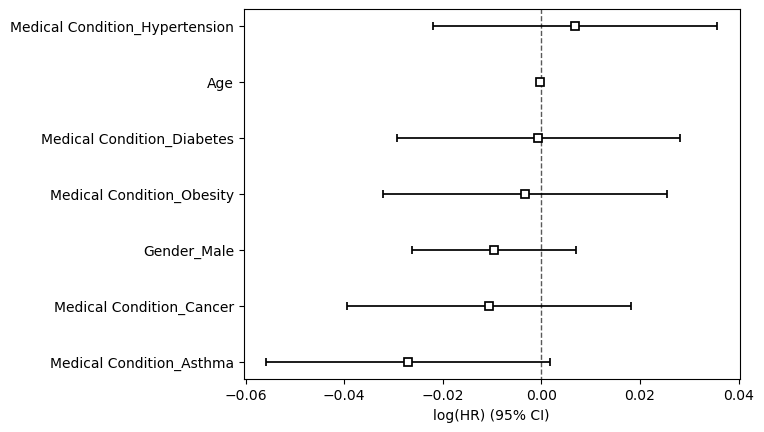

In [46]:
# Prepare data for CoxPH model
# Encoding categorical variables (yhandle other columns similarly)
df_encoded = pd.get_dummies(df[['Age', 'Gender', 'Medical Condition', 'Duration', 'Status']], drop_first=True)
# Initialize and fit Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df_encoded, duration_col='Duration', event_col='Status')
# Summary of the model
cph.print_summary()
# Plot the coefficients
cph.plot()
plt.show()